In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import seaborn as sns

#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('universal_tagset')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ghisl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer.model_max_length = 512

## Tools

In [4]:
apple_ubereat_df = pd.read_csv("CSV/uber-eats-livraison-de-repas_apple.csv").drop("title",axis=1)
android_ubereat_df= pd.read_csv("CSV/ubercab_android.csv")
df = pd.concat( 
    [apple_ubereat_df,android_ubereat_df], ignore_index=True) 
df

year  rating                                             review
0      2021       5  Nous devions être livré à 20h00 ce jour. L’adr...
1      2022       5  Cela fait plusieurs fois que je commande via v...
2      2018       5  Nous avons l’habitude de passer par cette appl...
3      2023       3  Je suis un fidèle client Uber Eats depuis main...
4      2020       5  Je met une étoile car on ne peut pas mettre mo...
...     ...     ...                                                ...
12095  2023       1  Service au mieux médiocre, livraison en moyenn...
12096  2023       5                                          Excellent
12097  2023       5                                      Très efficace
12098  2023       4  Suggestion: merci de voir comment payer avec d...
12099  2023       4  Simple et rapide ! J'utilise uber eats depuis ...

[12100 rows x 3 columns]

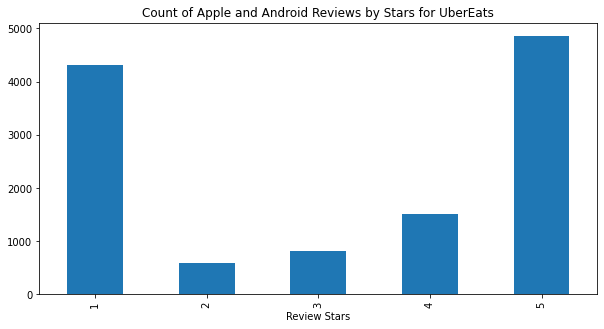

In [5]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Apple and Android Reviews by Stars for UberEats',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [17]:
def show_stars(df,string_explain):
    ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Apple and Android Reviews by Stars for ' + string_explain,
          figsize=(10, 5))
    ax.set_xlabel('Review Stars')
    plt.show()

In [6]:
apple_ubereat_df = pd.read_csv("CSV/mcdonalds_apple.csv").drop("title",axis=1)
android_ubereat_df= pd.read_csv("CSV/md_android.csv")
df_mcdo = pd.concat( 
    [apple_ubereat_df,android_ubereat_df], ignore_index=True) 

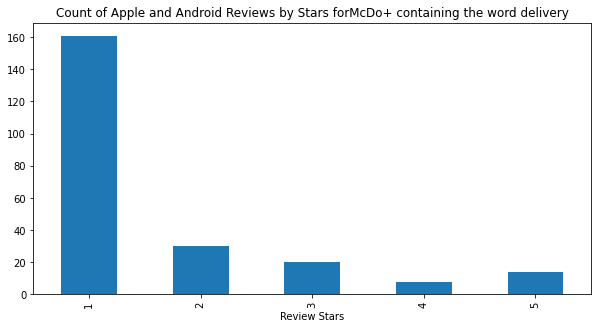

In [19]:
df_mcdo_liv = df_mcdo[df_mcdo["review"].str.contains("livraison")]
show_stars(df_mcdo_liv,"McDo+ containing the word delivery")



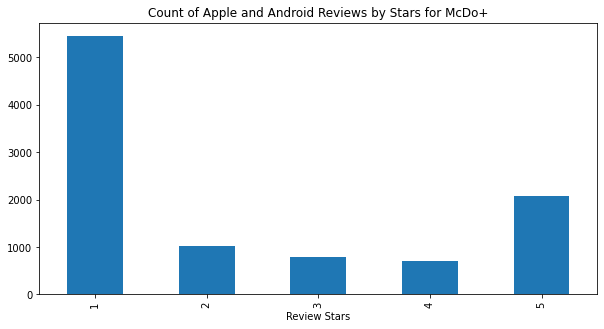

In [8]:
ax = df_mcdo['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Apple and Android Reviews by Stars for McDo+',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [9]:
def nltkModel(df):
    res = {}
    sia = SentimentIntensityAnalyzer()
    for i, row in df.iterrows():
        text = row['review']
        myid = i
        res[myid] = sia.polarity_scores(text)
    df_res = pd.DataFrame(res).T
    return df_res.merge(df,left_index=True,right_index=True)

In [10]:
def robertaOne(example):
    encoded_text = tokenizer(example, return_tensors='pt',padding='max_length', truncation=True, max_length=514)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

def robertaModel(df):
    res = {}
    for i, row in df.iterrows():
        text = row['review']
        myid = i
        res[myid] = robertaOne(text)
    df_res = pd.DataFrame(res).T
    return df_res.merge(df,left_index=True,right_index=True)


In [11]:
res = nltkModel(df)
res

neg    neu    pos  compound  year  rating  \
0      0.018  0.982  0.000   -0.5093  2021       5   
1      0.000  0.978  0.022    0.6449  2022       5   
2      0.000  0.941  0.059    0.8800  2018       5   
3      0.013  0.987  0.000   -0.2500  2023       3   
4      0.037  0.963  0.000   -0.7946  2020       5   
...      ...    ...    ...       ...   ...     ...   
12095  0.060  0.833  0.107    0.2960  2023       1   
12096  0.000  0.000  1.000    0.5719  2023       5   
12097  0.000  1.000  0.000    0.0000  2023       5   
12098  0.000  1.000  0.000    0.0000  2023       4   
12099  0.000  1.000  0.000    0.0000  2023       4   

                                                  review  
0      Nous devions être livré à 20h00 ce jour. L’adr...  
1      Cela fait plusieurs fois que je commande via v...  
2      Nous avons l’habitude de passer par cette appl...  
3      Je suis un fidèle client Uber Eats depuis main...  
4      Je met une étoile car on ne peut pas mettre mo...  
...                                                  ...  
12095  Service au mieux médiocre, livraison en moyenn...  
12096                                          Excellent  
12097                                      Très efficace  
12098  Suggestion: merci de voir comment payer avec d...  
12099  Simple et rapide ! J'utilise uber eats depuis ...  

[12100 rows x 7 columns]

In [12]:
finalres = robertaModel(res)

IndexError: index out of range in self

In [ ]:
res.sort_values(["neu","rating"])

neg  neu  pos  compound  year  rating  \
5038   1.0  0.0  0.0   -0.5423  2023       1   
7027   0.0  0.0  0.0    0.0000  2023       1   
9022   1.0  0.0  0.0   -0.5423  2023       1   
9755   1.0  0.0  0.0   -0.5423  2023       1   
12016  1.0  0.0  0.0   -0.5106  2023       1   
...    ...  ...  ...       ...   ...     ...   
12073  0.0  1.0  0.0    0.0000  2023       5   
12076  0.0  1.0  0.0    0.0000  2023       5   
12079  0.0  1.0  0.0    0.0000  2023       5   
12083  0.0  1.0  0.0    0.0000  2023       5   
12097  0.0  1.0  0.0    0.0000  2023       5   

                                            review  
5038                                      Horrible  
7027                                             😔  
9022                                      Horrible  
9755                                      Horrible  
12016                                      Thieves  
...                                            ...  
12073                              Trop pratique !  
12076                               Très bon merci  
12079                         Pratique et efficace  
12083  Livraison la plupart du temps en bonne etat  
12097                                Très efficace  

[12100 rows x 7 columns]

In [ ]:
sns.pairplot(data=finalres,
             vars=['neg', 'neu', 'pos',"compound"],
            hue='rating',
            palette='tab10')
plt.show()

NameError: name 'finalres' is not defined

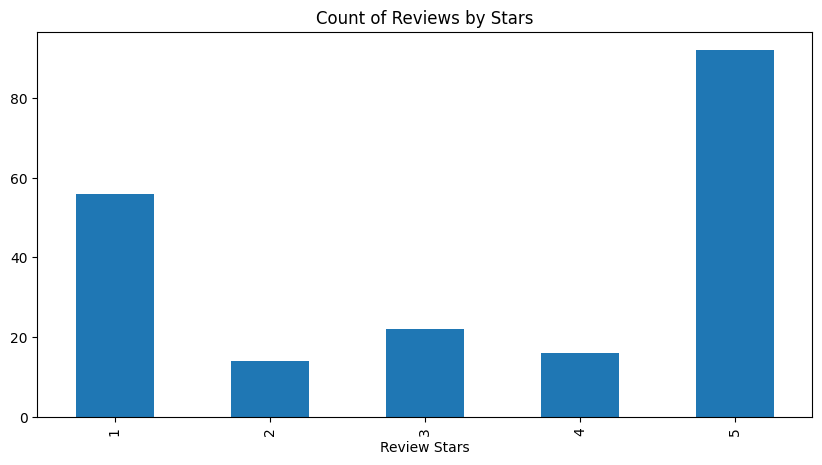

In [ ]:
ax = finalres['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()